In [25]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Navigate to the data folder
os.chdir(os.path.join(os.getcwd(), os.pardir, "data"))
# Get the data in the dataframe
df = pd.read_csv('merged_data_filtered.csv')
# Print the head of the dataframe
print(df.head())

   linenum    price  livingArea        lat        lng                  county  \
0        1  20000.0        50.0  45.901194  16.858852  Bjelovarsko-bilogorska   
1        2  21394.0        38.0  43.962192  15.431416                Zadarska   
2        3  23000.0        58.0  46.026470  16.541765  Koprivničko-križevačka   
3        4  24000.0        39.0  45.514016  14.641481      Primorsko-goranska   
4        5  24000.0        45.0  45.427443  15.011121      Primorsko-goranska   

                  city         neighborhood  flatBuildingtype  flatFloorCount  \
0             Bjelovar               Centar                 1               1   
1  Sveti Filip I Jakov  Sveti Filip i Jakov                 0               1   
2             Križevci             Križevci                 0               1   
3                Čabar               Gerovo                 0               1   
4             Vrbovsko             Moravice                 0               1   

   numberOfRooms  bathroom

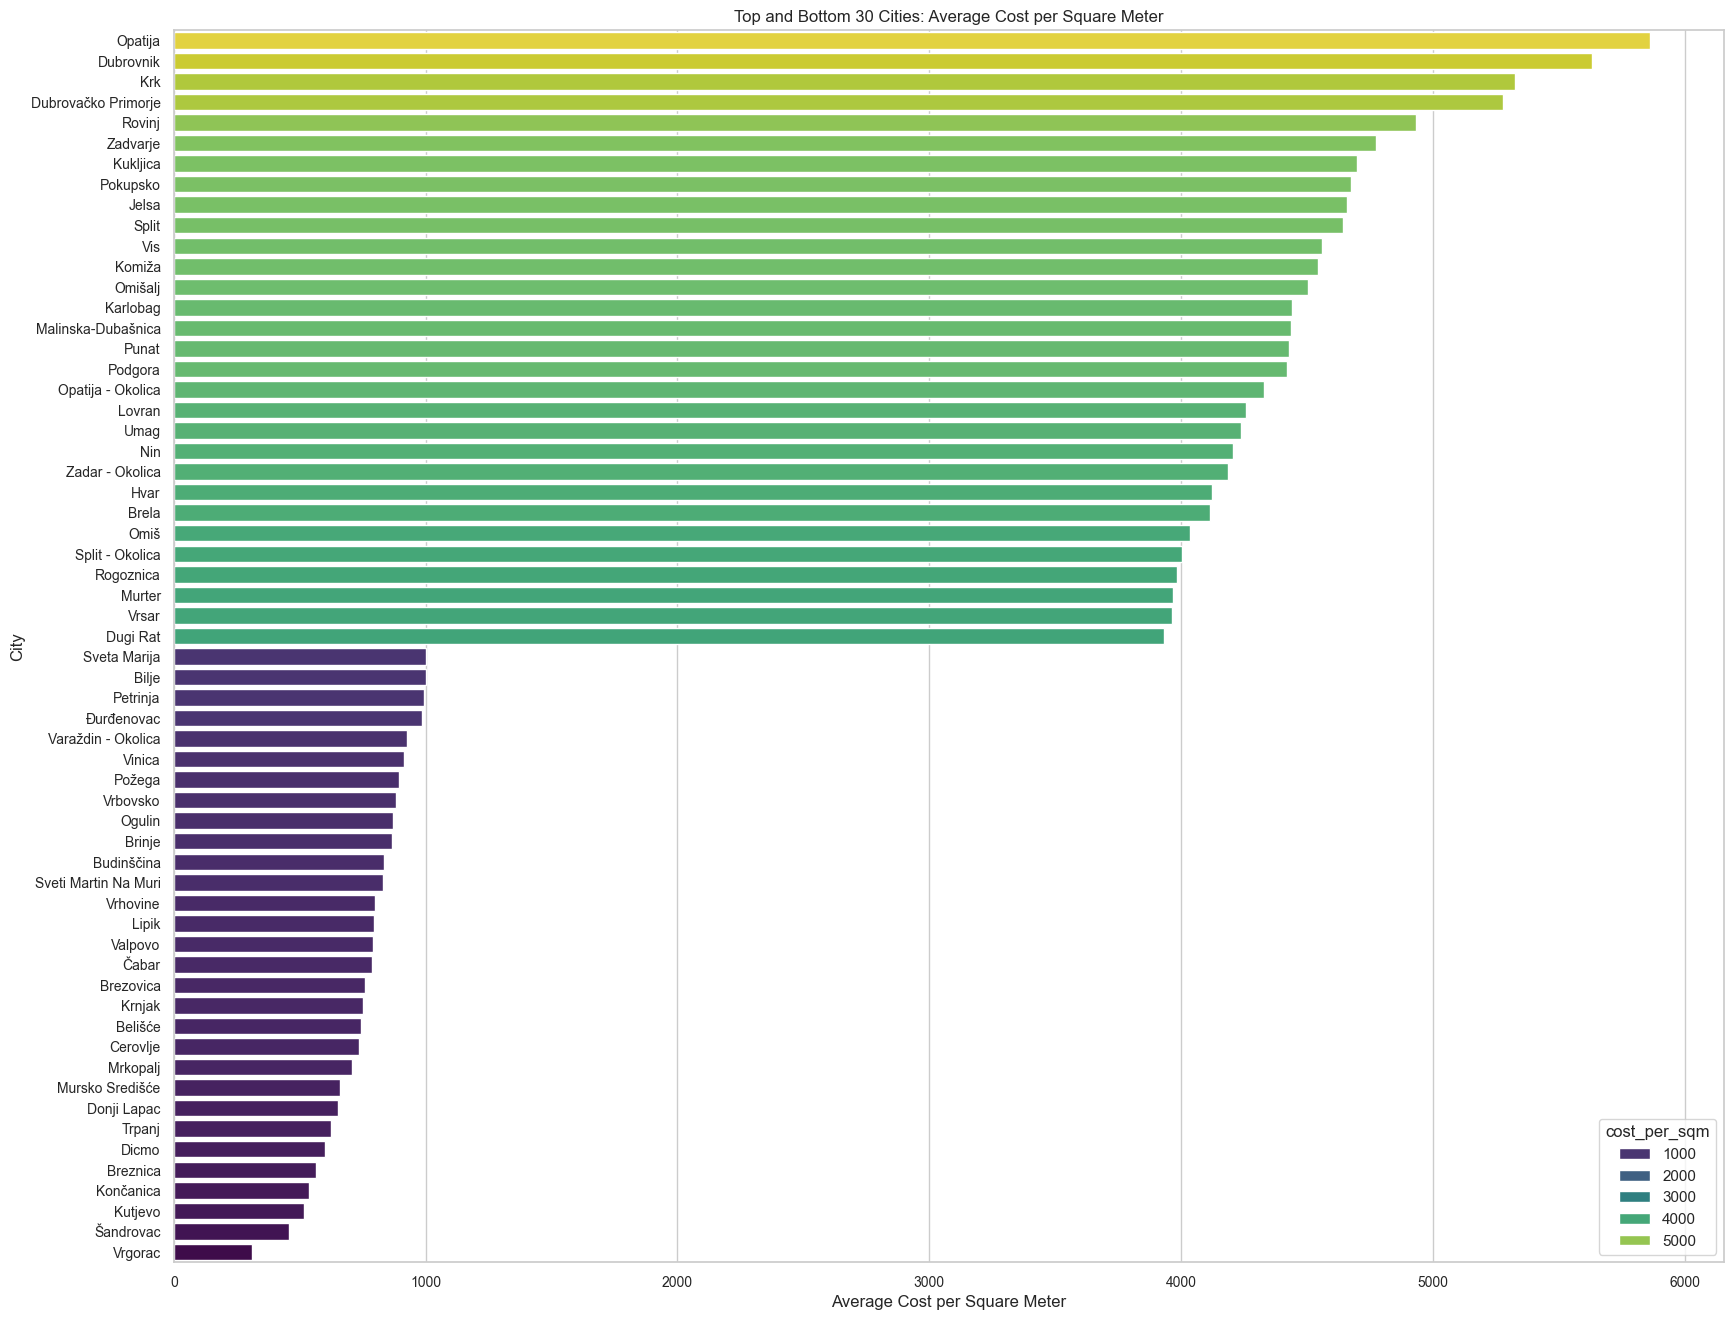

In [27]:
# Get the cost per square meter
df['cost_per_sqm'] = df['price'] / df['livingArea']
# Calculate the average cost per square meter for each city
avg_cost_per_sqm = df.groupby('city')['cost_per_sqm'].mean().sort_values(ascending=False).reset_index()

# Select top and bottom N cities
top_n = 30  # You can adjust this value based on your preference
bottom_n = 30
top_bottom_cities = pd.concat([avg_cost_per_sqm.head(top_n), avg_cost_per_sqm.tail(bottom_n)])

# Set a larger figure size
plt.figure(figsize=(20, 16))

# Create a horizontal bar plot using seaborn
sns.barplot(x='cost_per_sqm', y='city', data=top_bottom_cities, palette='viridis', hue='cost_per_sqm')

# Set plot labels and title
plt.xlabel('Average Cost per Square Meter')
plt.ylabel('City')
plt.title(f'Top and Bottom {top_n} Cities: Average Cost per Square Meter')

# Set smaller font size for better readability
plt.tick_params(axis='both', labelsize=10)

# Show the plot
plt.show()

<Figure size 1400x1000 with 0 Axes>

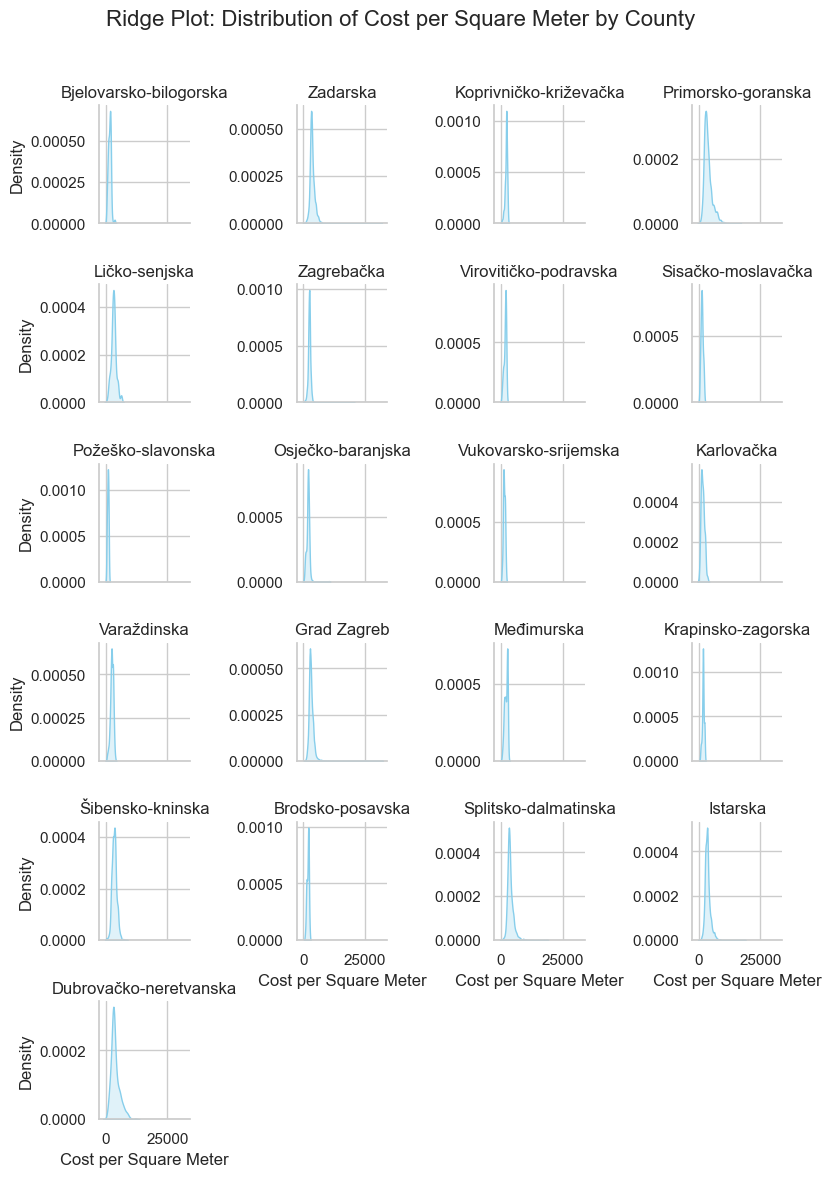

In [28]:
# Set a larger figure size
plt.figure(figsize=(14, 10))

# Create a FacetGrid for the ridge plot
g = sns.FacetGrid(df, col='county', col_wrap=4, height=2, sharey=False, margin_titles=True)

# Map a kernel density plot to each subplot with overlapping densities
g.map(sns.kdeplot, 'cost_per_sqm', color='skyblue', fill=True, common_norm=False)

# Set axis labels and titles
g.set_axis_labels('Cost per Square Meter', 'Density')
g.set_titles(col_template="{col_name}")

# Adjust plot appearance
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Ridge Plot: Distribution of Cost per Square Meter by County', fontsize=16)

# Show the plot
plt.show()